# Retagging Outs

## August 2023

There are a number of plays where the tracking data would suggest an out, and the game_info table would indicate that there should not be. 

The goal of this notebook is to have a space to investigate these plays, see if I can identify a systemic pattern that I could programatically correct, and retag some of these plays to get better results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Rectangle
import os

# Matt written files
from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

## Read in data from the full model pipeline

In [4]:
full_data_predicted = pd.read_csv("logisitc_predicted_scoop_scores.csv", index_col = 0)

In [6]:
full_data_predicted

,xy_throw_angle_throw,elevation_throw_angle_throw,throw_velo_throw,throw_bounced_throw,batter_dist_to_first_throw,thrower_x_throw,thrower_y_throw,batter_x_throw,batter_y_throw,ball_position_x_receive,ball_position_y_receive,ball_position_z_receive,predicted_prob,target,receiver_id,game_str,play_id,scoops_scores
22,0.337136,7.673381,51.323931,0,50.956094,53.0505,127.8984,27.6615,27.5550,62.7867,65.4375,3.705720,0.993660,0,2911,1901_01_TeamLG_TeamA3,241,-0.993660
34,3.766347,6.916256,71.742811,0,68.230243,2.3328,158.4438,14.8668,15.9261,64.1235,66.7086,3.549150,0.992692,0,1009,1903_12_TeamNC_TeamA1,208,-0.992692
16,2.444682,2.767601,67.331944,0,61.988213,3.3432,128.9223,19.8546,19.7601,61.4484,68.3100,3.855030,0.992124,0,5458,1900_07_TeamKL_TeamB,127,-0.992124
73,1.819536,5.527197,66.865727,0,60.668418,4.6719,127.1148,20.9238,20.5581,57.8037,66.0291,5.058630,0.990422,0,1918,1903_25_TeamNK_TeamB,126,-0.990422
75,0.460673,8.632045,57.791332,0,37.228126,77.2716,116.4831,37.3143,37.3164,64.9251,64.7700,4.776960,0.986454,0,9384,1902_07_TeamMJ_TeamB,281,-0.986454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.794953,0.619356,72.457057,1,32.741752,7.5006,128.4279,39.3366,41.6991,62.2479,69.2682,0.000000,0.609964,1,3187,1902_21_TeamME_TeamA2,41,0.390036
341,5.531019,-1.577025,46.326744,0,19.677618,33.1413,50.0007,48.4335,51.1503,58.9668,64.0995,4.414050,0.608480,1,3191,1902_01_TeamMG_TeamA3,25,0.391520
298,3.732881,4.834210,68.541386,0,29.831750,3.0537,128.0628,42.1581,42.9399,63.9396,68.3457,5.552460,0.587041,1,6222,1902_18_TeamMB_TeamA1,241,0.412959
642,3.603095,3.668221,72.605194,1,42.514771,-32.1918,151.6215,33.0090,34.1562,63.1638,69.2853,0.000000,0.361593,1,2526,1903_30_TeamNF_TeamA2,106,0.638407


### Repeat this process for the 25 on the top and bottom of this

In [373]:
which_obs = 34

In [374]:
this_game = full_data_predicted.iloc[which_obs]["game_str"]
this_play_id = full_data_predicted.iloc[which_obs]["play_id"]
this_target = full_data_predicted.iloc[which_obs]["target"]

In [375]:
bf = Baseball_Field(this_game, which_outs=["at_first"])

g_info = bf.game_obj.game_info_df.copy()
g_events = bf.game_obj.game_events_df.copy()

In [376]:
plt.close()

print(this_target)

bf.clear_plot()

play_id = this_play_id


#bf.plot_all_components(play_id=play_id)
#bf.fig

bf.create_gif(file_path="image_outputs/retagging_plays/", play_id=play_id, tag="--target is {}, should be {}".format(this_target, "out"))

MovieWriter ffmpeg unavailable; using Pillow instead.


0


In [377]:
this_ppg = bf.game_obj.get_ppg_from_pid(this_play_id)

print(this_ppg)

120


In [378]:
this_inning = g_info.loc[
    g_info["play_per_game"] == this_ppg,
    "inning"
].values[0]

In [379]:
g_info.loc[
    g_info["inning"] == this_inning,
    :

]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,is_out_at_first
103,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,35.0,120,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,5094,0,0,0,0,0.0,NaN,1,-1
104,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,36.0,121,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,4711,5094,0,0,1,NaN,NaN,1,0
105,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,36.0,122,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,4711,5094,0,0,1,NaN,NaN,1,0
106,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,36.0,123,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,4711,5094,0,0,1,NaN,NaN,1,0
107,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,36.0,124,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,4711,5094,0,0,1,NaN,NaN,1,0
108,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,37.0,125,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,5222,0,0,0,0,NaN,NaN,1,0
109,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,37.0,126,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,5222,0,0,0,0,NaN,NaN,1,0
110,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,37.0,127,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,5222,0,0,0,0,NaN,NaN,1,0
111,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,37.0,129,5,Top,2974,1195,1297,2255,1771,1181,1804,1177,2973,4275,5222,0,0,1,NaN,NaN,1,0
112,1902_26_TeamMC_TeamA1,TeamA1,TeamMC,37.0,130,5,Bottom,9264,5094,9559,8328,4275,4711,6783,5222,4646,1771,0,0,0,0,0.0,NaN,1,0


121


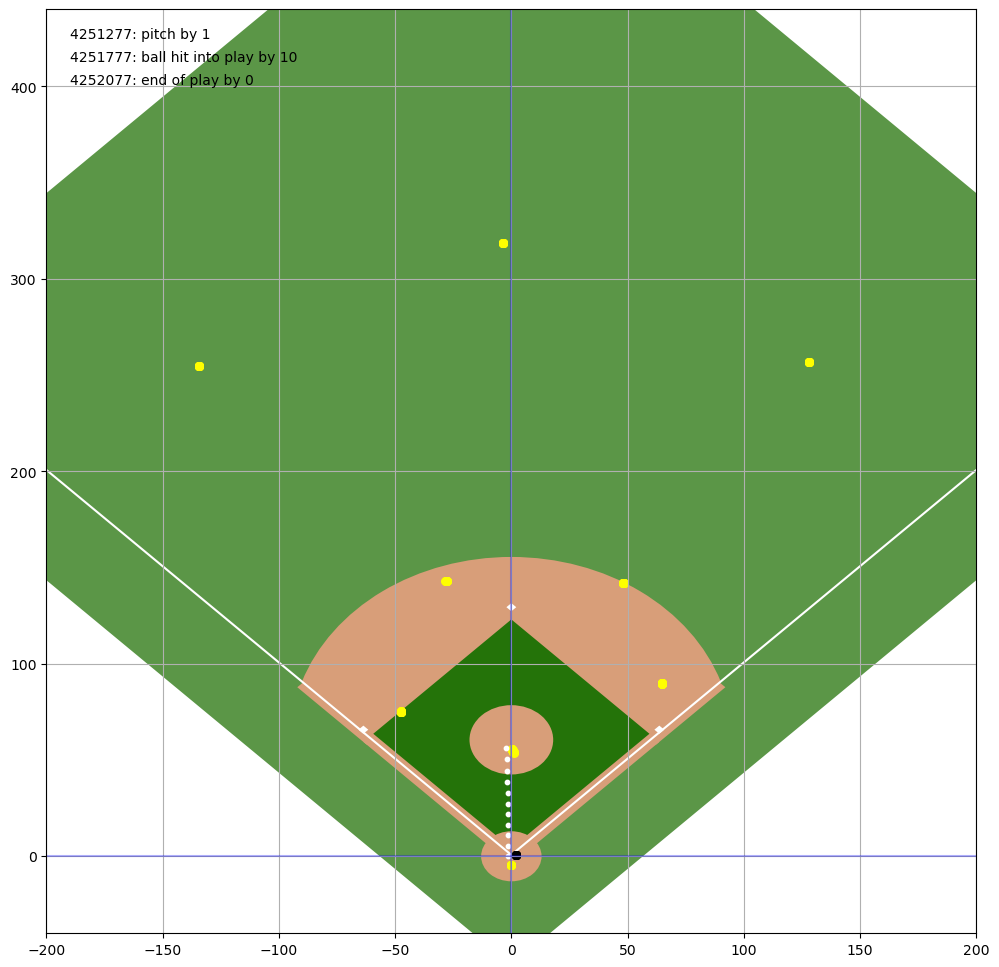

In [380]:
## what happened on the next play
plt.close()

bf.clear_plot()

play_id = this_play_id + 1

print(bf.game_obj.get_ppg_from_pid(play_id))

bf.plot_all_components(play_id=play_id)
bf.fig

# bf.create_gif(file_path="image_outputs/retagging_plays/", play_id=play_id, tag="--target is {}, should be {}".format("NA", "overthrow!"))

In [372]:
# check whether something is weird about my mapping between pid and ppg
g_events.loc[
    g_events["play_id"] == this_play_id,
    ["play_id" , "play_per_game"]].drop_duplicates()

,play_id,play_per_game
1368,356,356


### Mark what I think it should be in a spreadsheet

#### probably outs that might be mislabeled

- 1900_07_TeamKL_TeamB	127 should have been a double play
- 1900_07_TeamKL_TeamB	128 was an overthrow, not included somehow?
- 1903_25_TeamNK_TeamB	126 No clue what to do here, it looks like a DP -- but they are both on base the next play?
- 1902_07_TeamMJ_TeamB	281 Again, looks like an out, but they are both there on the next play in game info?
- 1902_14_TeamMK_TeamB	75 a sac bunt that for an out, running in in there in the game_info and shouldn't be because they aren't there in player tracking data on next play
- 1902_14_TeamMD_TeamA2	199 should be a clear out sac grounder, runner on third is erroneously tagged as batter
- 1901_02_TeamLG_TeamA3	125 batter in data for game_info incorrectly on next play, not in tracking data
- 1902_21_TeamME_TeamA2	174 batter marked as being on second in the next play, not in tracking data
- 1901_10_TeamLJ_TeamB	53 batter in data for game_info incorrectly on next play, not in tracking data
- 1901_13_TeamLL_TeamB	132 batter in data for game_info incorrectly on next play, not in tracking data
- 1901_07_TeamLK_TeamB	125 batter in data for game_info incorrectly on next play, not in tracking data
- 1903_11_TeamNC_TeamA1	110 might be correct actually
- 1902_16_TeamMD_TeamA2	35 should be a double play, game info is just wrong
- 1901_12_TeamLJ_TeamB	210 should be a double play, game info is just wrong
- 1901_10_TeamLJ_TeamB	93 should be an out, game info is fully wrong
- 1901_10_TeamLJ_TeamB	17 should be a double play, game info is fully wrong, no players in tracking data next two plays
- 1901_15_TeamLL_TeamB	137 should be an out, game info is once again wrong
- 1902_05_TeamML_TeamB	25 this play is correct!should not be an out! 
- 1901_03_TeamLG_TeamA3	168 should be an out
- 1902_10_TeamMI_TeamA3	212 this should be an out! I WONDER IF THE CORRECT GAME INFO IS THE ONE BEFORE? LOOKS LIKE IT MIGHT BE FOR THIS PLAY
- 1902_19_TeamME_TeamA2	62 should be an out!, this could correspond to play_per_game 67 and 68?
- 1903_05_TeamND_TeamA2	193 I think this one is correct! Looks like the throw pulled off the bag
- 1902_13_TeamMD_TeamA2	312 Should be an out, I think this this could correspond to 314!
- 1901_11_TeamLJ_TeamB	250 should def be an out
- 1903_23_TeamNA_TeamA1	196 
- 1902_13_TeamMK_TeamB	112 Problem is an off by one on player_per_game!
- 1901_03_TeamLG_TeamA3	144 Something messed up about all game info
- 1901_11_TeamLJ_TeamB	164 There is a missing play in the sequence and game_info is wrong
- 1900_07_TeamKL_TeamB	131 game info just wayy wrong
- 1903_16_TeamNI_TeamA3	162 this is just correct!
- 1902_05_TeamML_TeamB	143 theres a missing play
- 1902_30_TeamMF_TeamA2	186 game info is just wrong
- 1902_24_TeamMA_TeamA1	356 should be double play!
- 1902_26_TeamMC_TeamA1	120 should be an out

#### probably not outs that might be mislabeled (these are generally correct!

- 1901_10_TeamLJ_TeamB	244 Should not be in the data set!, its a fly to left
- 1903_30_TeamNF_TeamA2	106 should maybe be a double play, something is wrong with game info though!
- 1902_18_TeamMB_TeamA1	241 not mislabeled!
- 1902_01_TeamMG_TeamA3	25 I think this is a snag that was thrown just in case
- 1902_21_TeamME_TeamA2	41 a turned double play! nothing wrong here except the game_info is wrong



### Use that spreadsheet to override whatever the tag was before!